<a href="https://colab.research.google.com/github/ktatikon/Credit-card-transactions/blob/main/Credit_card%20trans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',50)
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/sample_data/1card_transaction_sample.csv')
df.head(5)

,TransactionID,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,Errors?
0,8614629,742,0,2019,7,4,14:26,$53.86,Online Transaction,-7421093378627544099,ONLINE,NaN,5311,NaN
1,17765215,1433,0,2019,11,24,13:06,$3.23,Chip Transaction,1799189980464955940,Denver,PA,5499,NaN
2,5602301,481,0,2019,11,12,22:05,$71.63,Online Transaction,-2088492411650162548,ONLINE,NaN,4784,NaN
3,7605652,645,2,2019,2,6,11:50,$90.69,Chip Transaction,32546433721731896,Scituate,MA,5211,NaN
4,22129890,1801,0,2019,10,31,19:49,$7.27,Chip Transaction,-3265671264153192329,Fair Lawn,NJ,7832,NaN


In [ ]:
df.shape

(500000, 14)

In [ ]:
#Finding percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df =pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                   column_name  percent_missing
TransactionID    TransactionID           0.0000
User                      User           0.0000
Card                      Card           0.0000
Year                      Year           0.0000
Month                    Month           0.0000
Day                        Day           0.0000
Time                      Time           0.0000
Amount                  Amount           0.0000
Use Chip              Use Chip           0.0000
Merchant Name    Merchant Name           0.0000
Merchant City    Merchant City           0.0000
MCC                        MCC           0.0000
Merchant State  Merchant State          12.5786
Errors?                Errors?          98.4192


In [ ]:
df.nunique().sort_values()

Year                   1
Use Chip               3
Card                   9
Month                 12
Errors?               16
Day                   31
MCC                  109
Merchant State       127
Time                1440
User                1550
Merchant City       6882
Merchant Name      23223
Amount             27491
TransactionID     500000
dtype: int64

In [ ]:
df.dtypes

TransactionID      int64
User               int64
Card               int64
Year               int64
Month              int64
Day                int64
Time              object
Amount            object
Use Chip          object
Merchant Name      int64
Merchant City     object
Merchant State    object
MCC                int64
Errors?           object
dtype: object

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

In [ ]:
df['hour'] = df['Time'].dt.hour

In [ ]:
df['Mins'] = df['Time'].dt.minute

In [ ]:
df["Amount"]=df["Amount"].str.replace("$","")

In [ ]:
df["Amount"]= df["Amount"].astype(float)

In [ ]:
item_counts = df["Errors?"].value_counts()
print(item_counts)

Insufficient Balance,                     4774
Bad PIN,                                  1191
Technical Glitch,                         1025
Bad Card Number,                           338
Bad Expiration,                            265
Bad CVV,                                   252
Bad Zipcode,                                27
Bad PIN,Insufficient Balance,                8
Bad Card Number,Bad CVV,                     5
Insufficient Balance,Technical Glitch,       4
Bad Expiration,Insufficient Balance,         4
Bad PIN,Technical Glitch,                    4
Bad Card Number,Insufficient Balance,        4
Bad Card Number,Technical Glitch,            1
Bad Expiration,Bad CVV,                      1
Bad Card Number,Bad Expiration,              1
Name: Errors?, dtype: int64


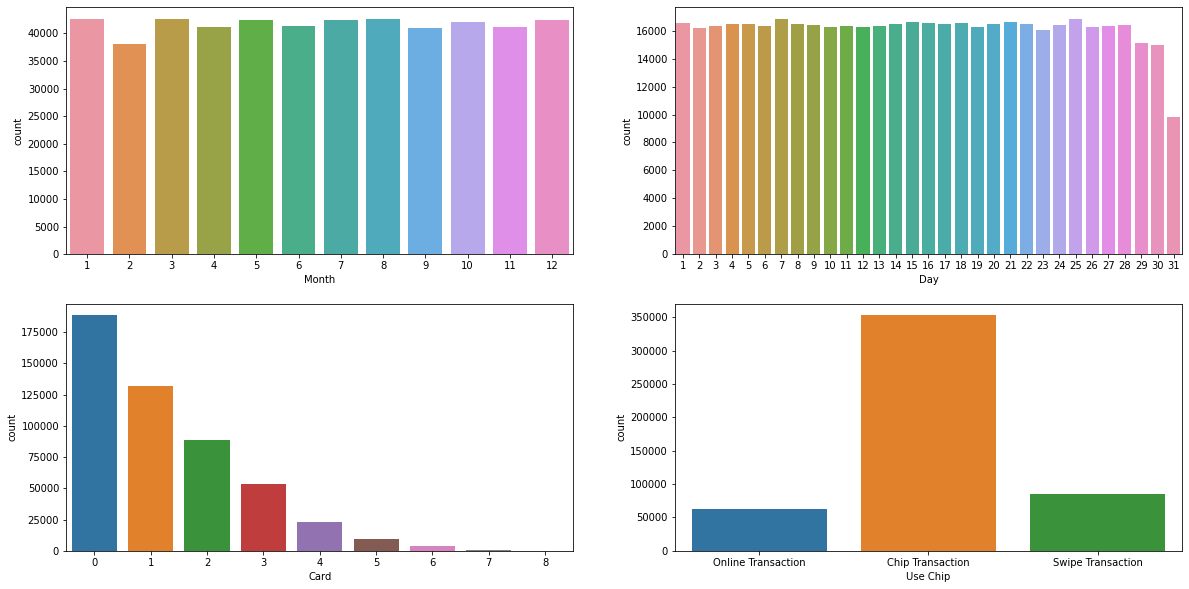

In [ ]:
plt.figure(figsize=(20,10)) #univariate analysis-catagorical variables
cat_var=['Month','Day','Card','Use Chip']
for i in enumerate(cat_var):
    plt.subplot(2,2,i[0]+1)
    ax = sns.countplot(df[i[1]])

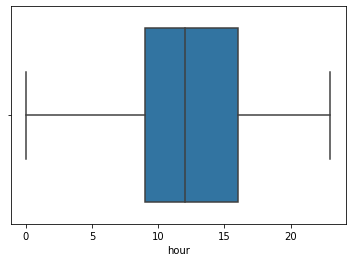

In [ ]:
sns.boxplot(x='hour',data =df)

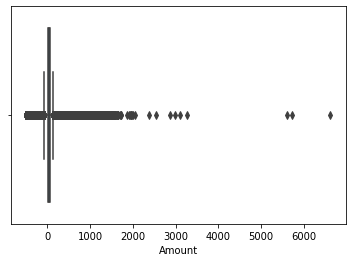

In [ ]:
sns.boxplot(x='Amount',data =df)

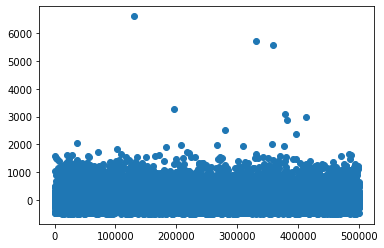

In [ ]:
plt.scatter(df.index,df["Amount"])

In [ ]:
df

,TransactionID,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,Errors?,hour,Mins
0,8614629,742,0,2019,7,4,2023-01-20 14:26:00,53.86,Online Transaction,-7421093378627544099,ONLINE,NaN,5311,NaN,14,26
1,17765215,1433,0,2019,11,24,2023-01-20 13:06:00,3.23,Chip Transaction,1799189980464955940,Denver,PA,5499,NaN,13,6
2,5602301,481,0,2019,11,12,2023-01-20 22:05:00,71.63,Online Transaction,-2088492411650162548,ONLINE,NaN,4784,NaN,22,5
3,7605652,645,2,2019,2,6,2023-01-20 11:50:00,90.69,Chip Transaction,32546433721731896,Scituate,MA,5211,NaN,11,50
4,22129890,1801,0,2019,10,31,2023-01-20 19:49:00,7.27,Chip Transaction,-3265671264153192329,Fair Lawn,NJ,7832,NaN,19,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2854310,240,0,2019,7,25,2023-01-20 18:03:00,76.35,Chip Transaction,-5150809768557912412,Sherman Oaks,CA,5812,NaN,18,3
499996,5931511,500,0,2019,12,22,2023-01-20 09:19:00,29.73,Chip Transaction,8386980700155423531,Douglassville,PA,5310,NaN,9,19
499997,13384174,1096,5,2019,11,27,2023-01-20 07:05:00,190.46,Chip Transaction,-8551042844988651404,Lebanon,OR,4900,NaN,7,5
499998,15759943,1279,2,2019,11,16,2023-01-20 07:25:00,4.52,Chip Transaction,4722913068560264812,Danielsville,GA,5411,NaN,7,25


In [ ]:
df['Merchant State']=df['Merchant State'].fillna(df['Merchant State'].mode().iloc[0])

In [ ]:
to_convert=['Use Chip','Merchant City','Merchant State']
df[to_convert]=df[to_convert].astype('category')

In [ ]:
df[to_convert]=df[to_convert].apply(lambda x:x.cat.codes)

In [ ]:
df

,TransactionID,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,Errors?,hour,Mins
0,8614629,742,0,2019,7,4,2023-01-20 14:26:00,53.86,1,-7421093378627544099,0,14,5311,NaN,14,26
1,17765215,1433,0,2019,11,24,2023-01-20 13:06:00,3.23,0,1799189980464955940,1538,86,5499,NaN,13,6
2,5602301,481,0,2019,11,12,2023-01-20 22:05:00,71.63,1,-2088492411650162548,0,14,4784,NaN,22,5
3,7605652,645,2,2019,2,6,2023-01-20 11:50:00,90.69,0,32546433721731896,5575,56,5211,NaN,11,50
4,22129890,1801,0,2019,10,31,2023-01-20 19:49:00,7.27,0,-3265671264153192329,1967,74,7832,NaN,19,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,2854310,240,0,2019,7,25,2023-01-20 18:03:00,76.35,0,-5150809768557912412,5675,14,5812,NaN,18,3
499996,5931511,500,0,2019,12,22,2023-01-20 09:19:00,29.73,0,8386980700155423531,1606,86,5310,NaN,9,19
499997,13384174,1096,5,2019,11,27,2023-01-20 07:05:00,190.46,0,-8551042844988651404,3354,84,4900,NaN,7,5
499998,15759943,1279,2,2019,11,16,2023-01-20 07:25:00,4.52,0,4722913068560264812,1465,31,5411,NaN,7,25


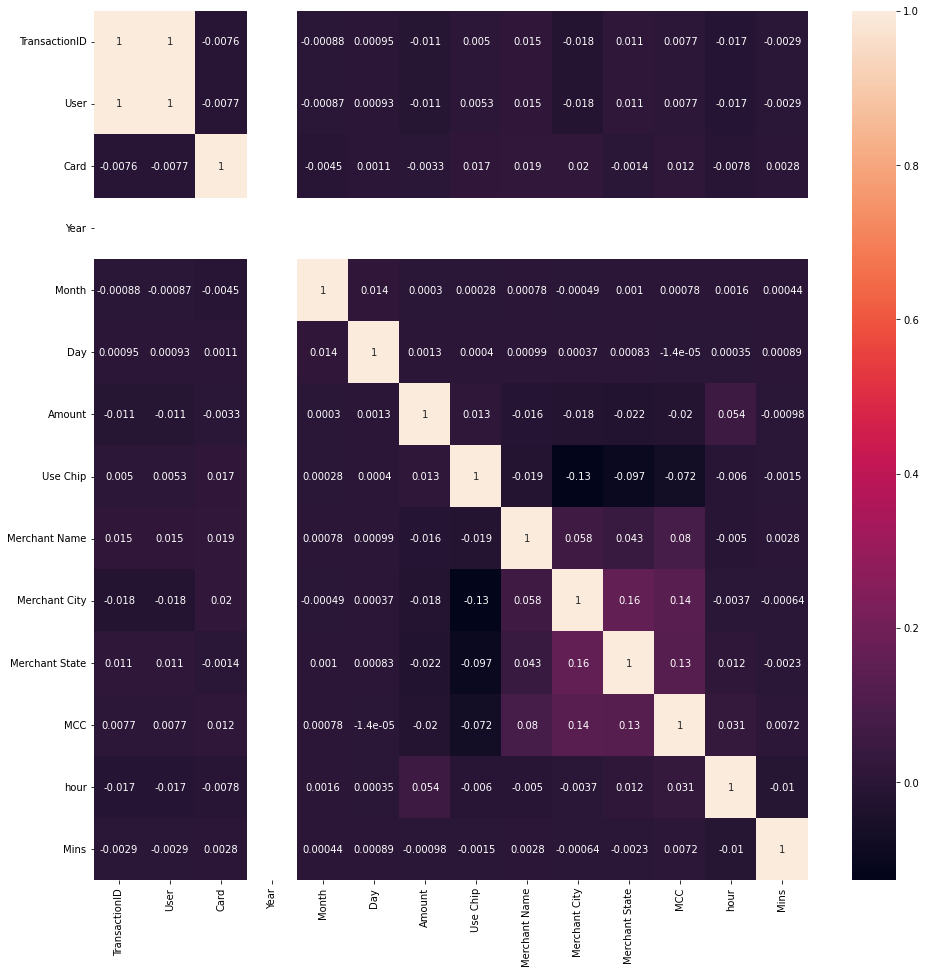

In [ ]:
plt.figure(figsize=(16,16))#correlation matrix
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df=df.drop(['Errors?','Time'],axis=1)

In [ ]:
df1= df

In [ ]:
df1.head(2)

,TransactionID,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,hour,Mins
0,8614629,742,0,2019,7,4,53.86,1,-7421093378627544099,0,14,5311,14,26
1,17765215,1433,0,2019,11,24,3.23,0,1799189980464955940,1538,86,5499,13,6


In [ ]:
df1=df1.drop(['TransactionID'],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df1['Amount'] = scaler.fit_transform(df1['Amount'])

ValueError: ignored

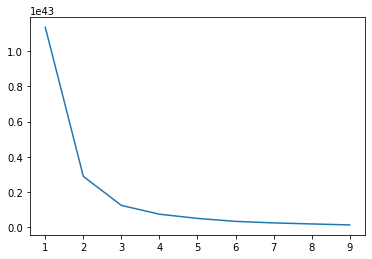

In [ ]:
from sklearn.cluster import KMeans
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df1)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

In [ ]:
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(df1)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [ ]:
df_org = df.copy()

In [ ]:
df.head()

,TransactionID,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,hour,Mins
0,8614629,742,0,2019,7,4,53.86,1,-7421093378627544099,0,14,5311,14,26
1,17765215,1433,0,2019,11,24,3.23,0,1799189980464955940,1538,86,5499,13,6
2,5602301,481,0,2019,11,12,71.63,1,-2088492411650162548,0,14,4784,22,5
3,7605652,645,2,2019,2,6,90.69,0,32546433721731896,5575,56,5211,11,50
4,22129890,1801,0,2019,10,31,7.27,0,-3265671264153192329,1967,74,7832,19,49


In [ ]:
col = df.columns
col

Index(['TransactionID', 'User', 'Card', 'Year', 'Month', 'Day', 'Amount',
       'Use Chip', 'Merchant Name', 'Merchant City', 'Merchant State', 'MCC',
       'hour', 'Mins'],
      dtype='object')

In [ ]:
df_km = pd.concat([df.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_km.columns = ['TransactionID', 'User', 'Card', 'Year', 'Month', 'Day', 'Amount', 'Use Chip', 'Merchant Name', 'Merchant City', 'Merchant State', 'MCC',
       'hour', 'Mins','cluster_id']
df_km.head()

,TransactionID,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,MCC,hour,Mins,cluster_id
0,8614629,742,0,2019,7,4,53.86,1,-7421093378627544099,0,14,5311,14,26,1
1,17765215,1433,0,2019,11,24,3.23,0,1799189980464955940,1538,86,5499,13,6,2
2,5602301,481,0,2019,11,12,71.63,1,-2088492411650162548,0,14,4784,22,5,2
3,7605652,645,2,2019,2,6,90.69,0,32546433721731896,5575,56,5211,11,50,2
4,22129890,1801,0,2019,10,31,7.27,0,-3265671264153192329,1967,74,7832,19,49,1


In [ ]:
df_km.isnull().sum()

TransactionID     0
User              0
Card              0
Year              0
Month             0
Day               0
Amount            0
Use Chip          0
Merchant Name     0
Merchant City     0
Merchant State    0
MCC               0
hour              0
Mins              0
cluster_id        0
dtype: int64

In [ ]:
df_km['cluster_id'].value_counts()

1    193144
2    180130
0    126726
Name: cluster_id, dtype: int64

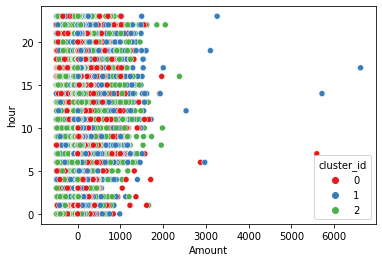

In [ ]:
sns.scatterplot(x = 'Amount', y = 'hour', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

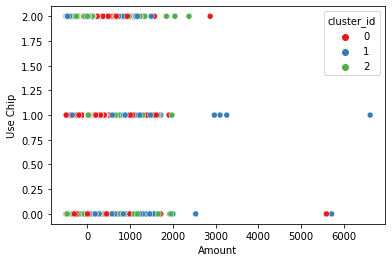

In [ ]:
sns.scatterplot(x = 'Amount', y = 'Use Chip', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

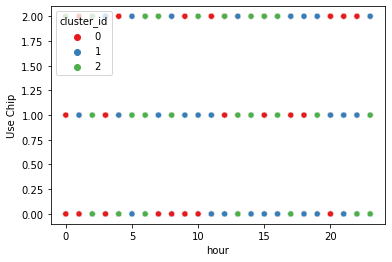

In [ ]:
sns.scatterplot(x = 'hour', y = 'Use Chip', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

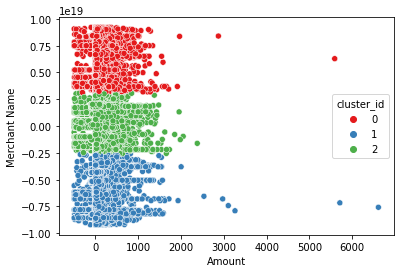

In [ ]:
sns.scatterplot(x = 'Amount', y = 'Merchant Name', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

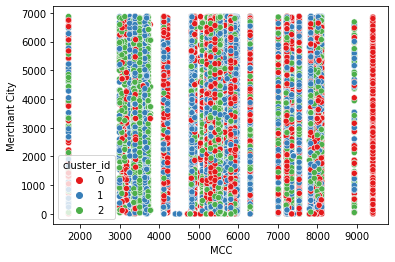

In [ ]:
sns.scatterplot(x = 'MCC', y = 'Merchant City', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

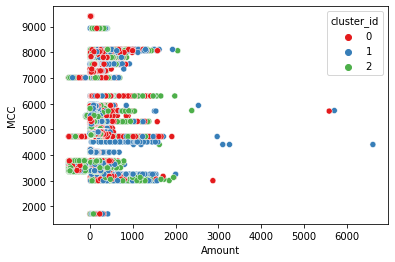

In [ ]:
sns.scatterplot(x = 'Amount', y = 'MCC', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

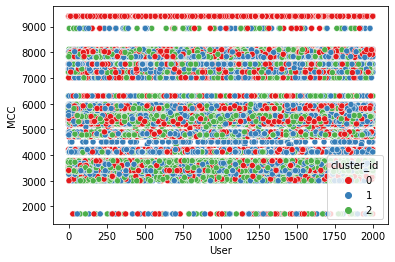

In [ ]:
sns.scatterplot(x = 'User', y = 'MCC', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')